In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [11]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']
X = df[features]
y = df.Outcome

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [14]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,   8],
       [ 27,  40]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.81      0.94      0.87       125
   with diabetes       0.83      0.60      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



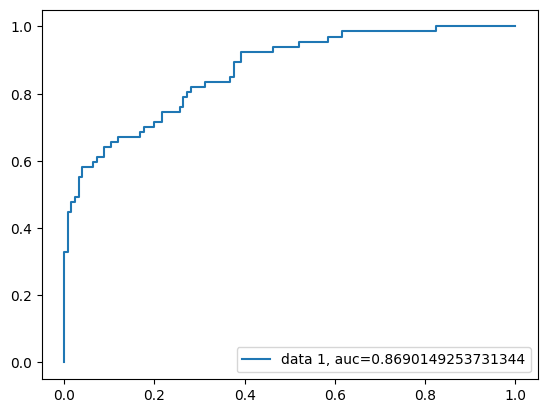

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_salary_Purchased = pd.read_csv('dataset.csv')

df_salary_Purchased.head()


df_salary_Purchased.columns = ['Distance', 'Speed']

df_salary_Purchased.head()


plt.figure(figsize=(8, 6))
sns.countplot(x=df_salary_Purchased['Speed'])
plt.title('Distribution of Speed')
plt.xlabel('Purachase')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_salary_Purchased['Salary'], y=df_salary_Purchased['Purchased'], hue=df_salary_Purchased['Purchased'], s=100)
plt.title('Salary vs. Purachase')
plt.xlabel('Salary')
plt.ylabel('Purachase')
plt.legend(title='Purachase')
plt.show()


correlation_matrix = df_salary_Purchased.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


mean = df_salary_Purchased.mean(axis=0)
print(mean)


size = len(df_salary_Purchased['Salary'])


mean_x = mean['Salary']
mean_y = mean['Purchased']

dev_x = df_salary_Purchased['Salary'] - mean_x
dev_y = df_salary_Purchased['Purchased'] - mean_y


prod_dev = dev_x * dev_y


sop = prod_dev.sum()


sq_dev_x = dev_x ** 2


m = sop / sq_dev_x.sum()
b = mean_y - (m * mean_x)


predicted_y = m * df_salary_Purchased['Salary'] + b


plt.plot(df_salary_Purchased['Salary'], predicted_y, color='red', label='Regression Line')


plt.xlabel('Salary')
plt.ylabel('Predicted Purachase')
plt.title('Linear Regression Example')
plt.legend()
plt.grid()

plt.scatter(df_salary_Purchased['Salary'], df_salary_Purchased['Purchased'])
plt.scatter(df_salary_Purchased['Salary'], predicted_y)


plt.show()

y_pred = [0]*size
for i in range(size):
    y_pred[i] = 1 / (1 + np.exp(-(b + m * df_salary_Purchased['Salary'][i])))


plt.figure(figsize=(8, 6))
plt.scatter(df_salary_Purchased['Salary'], y_pred, color='blue', label='Predicted Probabilities')


plt.xlabel('Salary')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probabilities from Logistic Regression')
plt.legend()
plt.grid()


plt.show()
